# Analysis of results from multiple reference/citation of public medical image datasets in scientific papers from different venues

## Loading of results

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from dirty_cat import fuzzy_join

papers_info = pd.read_csv("../../Results/extraction/papers_infos_openalex.csv")
df_oa_reference_allInfo = pd.read_csv("../../Results/extraction/oa_papers_datasets_reference.csv").drop_duplicates(["name"])
df_oa_reference_allInfo["year"] = papers_info["year"]
df_oa_reference_allInfo["venue"] = papers_info["venue"]
df_oa_reference_allInfo = df_oa_reference_allInfo[(df_oa_reference_allInfo["year"]>2010) & (df_oa_reference_allInfo["year"]<2023)]

df_oa_abstract_allInfo = pd.read_csv("../../Results/extraction/oa_papers_datasets_abstract.csv").drop_duplicates(["name"])
df_oa_abstract_allInfo["year"] = papers_info["year"]
df_oa_abstract_allInfo["venue"] = papers_info["venue"]
df_oa_abstract_allInfo = df_oa_abstract_allInfo[(df_oa_abstract_allInfo["year"]>2010) & (df_oa_abstract_allInfo["year"]<2023)]

fulltext_abstract_info = pd.read_csv("../../Results/extraction/fulltext_datasets_abstract.csv").drop_duplicates(["name"])
fulltext_references_info = pd.read_csv("../../Results/extraction/fulltext_datasets_references.csv").drop_duplicates(["name"])
fulltext_method_info = pd.read_csv("../../Results/extraction/fulltext_datasets_method.csv").drop_duplicates(["name"])
fulltext_results_info = pd.read_csv("../../Results/extraction/fulltext_datasets_results.csv").drop_duplicates(["name"])

common_papers = fuzzy_join(
    fulltext_abstract_info,  # our table to join
    df_oa_abstract_allInfo,  # the table to join with
    left_on="name",  # the first join key column
    right_on="name",  # the second join key column
    return_score=True,
)

#Names for fulltext df
common_papers_x = common_papers["name_x"]

#Name for OA df
common_papers_y = common_papers["name_y"]

fulltext_abstract_info["venue"] = common_papers["venue"]
fulltext_references_info["venue"] = common_papers["venue"]
fulltext_method_info["venue"] = common_papers["venue"]
fulltext_results_info["venue"] = common_papers["venue"]


datasets_columns = df_oa_reference_allInfo.columns.difference(['doi','name','venue','year'])

/home/theo/miniconda3/envs/PublicDataset/lib/python3.12/site-packages/dirty_cat/_fuzzy_join.py:320: UserWarning: This feature is still experimental.
  warnings.warn("This feature is still experimental.")


In [17]:
len(common_papers)

2248

## Dataviz using only OpenAlex

### Number of presence in references by dataset

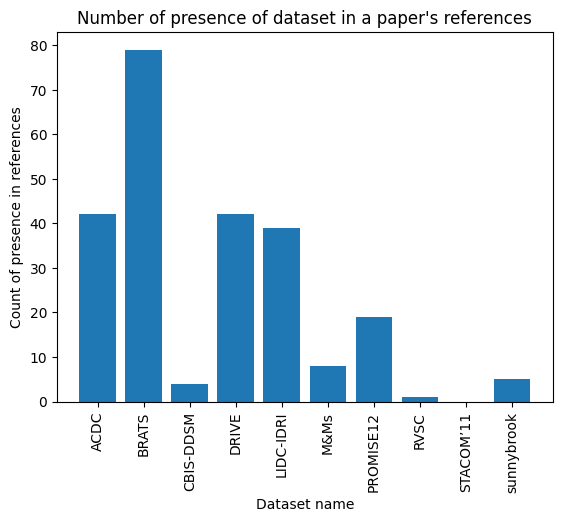

ACDC          42
BRATS         79
CBIS-DDSM      4
DRIVE         42
LIDC-IDRI     39
M&Ms           8
PROMISE12     19
RVSC           1
STACOM’11      0
sunnybrook     5
dtype: int64

In [18]:
df_oa_reference_toplot = df_oa_reference_allInfo[datasets_columns]
plt.figure()
plt.bar(datasets_columns,df_oa_reference_toplot.sum())
plt.xticks(datasets_columns, rotation='vertical')
plt.xlabel("Dataset name")
plt.ylabel("Count of presence in references")
plt.title("Number of presence of dataset in a paper's references")
plt.savefig('../../Results/analysis/paper_ref_per_dataset.png')
plt.show()
df_oa_reference_toplot.sum()

Comments:

### Number of presence in references by dataset and venues

<Figure size 640x480 with 0 Axes>

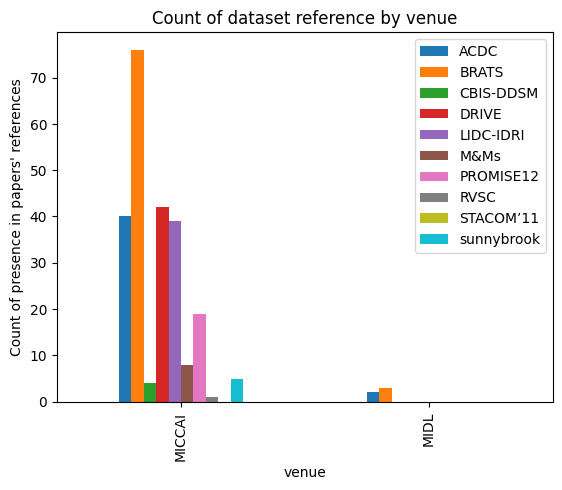

,ACDC,BRATS,CBIS-DDSM,DRIVE,LIDC-IDRI,M&Ms,PROMISE12,RVSC,STACOM’11,sunnybrook
venue,,,,,,,,,,
MICCAI,40,76,4,42,39,8,19,1,0,5
MIDL,2,3,0,0,0,0,0,0,0,0


In [19]:
df_oa_reference_toplot = df_oa_reference_allInfo[df_oa_reference_allInfo.columns.difference(['doi','name','year'])]
#groupby_venues = df_oa_abstract_toplot[["venue","ACDC"]].groupby("venue").sum()
count_per_dataset_and_venue = df_oa_reference_toplot.groupby("venue").sum()
plt.figure()
t = count_per_dataset_and_venue.plot.bar()
plt.ylabel("Count of presence in papers' references")
plt.title("Count of dataset reference by venue")
plt.savefig('../../Results/analysis/paper_ref_per_venue_and_dataset.png')
plt.show()
count_per_dataset_and_venue

### Number of presence in references by dataset and years

<Figure size 640x480 with 0 Axes>

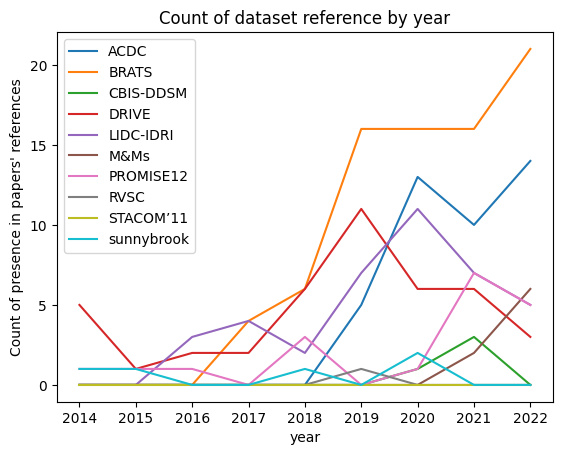

,ACDC,BRATS,CBIS-DDSM,DRIVE,LIDC-IDRI,M&Ms,PROMISE12,RVSC,STACOM’11,sunnybrook
year,,,,,,,,,,
2014.0,0,0,0,5,0,0,1,0,0,1
2015.0,0,0,0,1,0,0,1,0,0,1
2016.0,0,0,0,2,3,0,1,0,0,0
2017.0,0,4,0,2,4,0,0,0,0,0
2018.0,0,6,0,6,2,0,3,0,0,1
2019.0,5,16,0,11,7,0,0,1,0,0
2020.0,13,16,1,6,11,0,1,0,0,2
2021.0,10,16,3,6,7,2,7,0,0,0
2022.0,14,21,0,3,5,6,5,0,0,0


<Figure size 640x480 with 0 Axes>

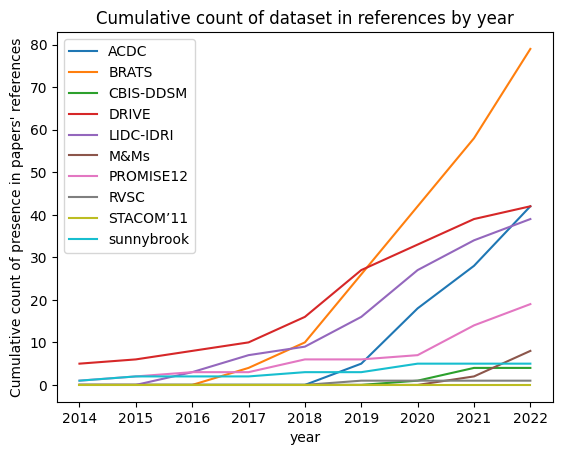

,ACDC,BRATS,CBIS-DDSM,DRIVE,LIDC-IDRI,M&Ms,PROMISE12,RVSC,STACOM’11,sunnybrook
year,,,,,,,,,,
2014.0,0,0,0,5,0,0,1,0,0,1
2015.0,0,0,0,6,0,0,2,0,0,2
2016.0,0,0,0,8,3,0,3,0,0,2
2017.0,0,4,0,10,7,0,3,0,0,2
2018.0,0,10,0,16,9,0,6,0,0,3
2019.0,5,26,0,27,16,0,6,1,0,3
2020.0,18,42,1,33,27,0,7,1,0,5
2021.0,28,58,4,39,34,2,14,1,0,5
2022.0,42,79,4,42,39,8,19,1,0,5


In [20]:
df_oa_reference_toplot = df_oa_reference_allInfo[df_oa_reference_allInfo.columns.difference(['doi','name','venue'])]
count_per_dataset_and_venue = df_oa_reference_toplot.groupby("year").sum()
plt.figure()
t = count_per_dataset_and_venue.plot()
plt.ylabel("Count of presence in papers' references")
plt.title("Count of dataset reference by year")
plt.savefig('../../Results/analysis/dataset_ref_per_year.png')
plt.show()
display(count_per_dataset_and_venue)

cumulcount_per_dataset_and_venue = count_per_dataset_and_venue.cumsum()
plt.figure()
cumulcount_per_dataset_and_venue.plot()
plt.ylabel("Cumulative count of presence in papers' references")
plt.title("Cumulative count of dataset in references by year")
plt.savefig('../../Results/analysis/dataset_ref_per_year_cumul.png')
plt.show()
display(cumulcount_per_dataset_and_venue)

### Number of presence in abstract by dataset

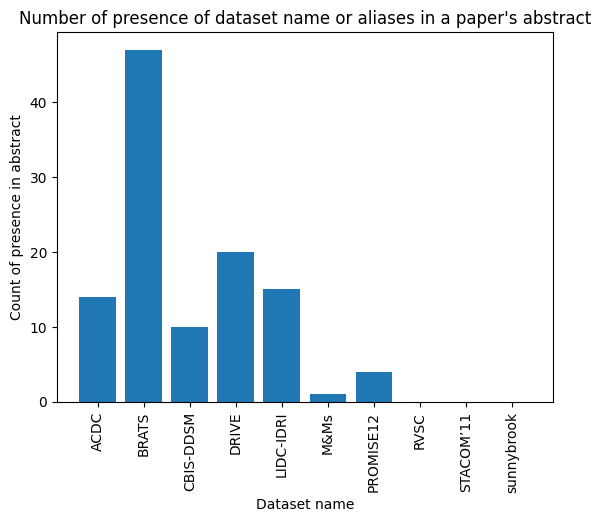

ACDC          14
BRATS         47
CBIS-DDSM     10
DRIVE         20
LIDC-IDRI     15
M&Ms           1
PROMISE12      4
RVSC           0
STACOM’11      0
sunnybrook     0
dtype: int64

In [21]:
df_oa_abstract_toplot = df_oa_abstract_allInfo[df_oa_abstract_allInfo.columns.difference(['doi', 'name','venue','year'])]
plt.figure()
plt.bar(datasets_columns,df_oa_abstract_toplot.sum())
plt.xticks(datasets_columns, rotation='vertical')
plt.xlabel("Dataset name")
plt.ylabel("Count of presence in abstract")
plt.title("Number of presence of dataset name or aliases in a paper's abstract")
plt.savefig('../../Results/analysis/paper_abstract_per_dataset.png')
plt.show()
display(df_oa_abstract_toplot.sum())

Comments:

### Number of presence in abstract by dataset and venues

<Figure size 640x480 with 0 Axes>

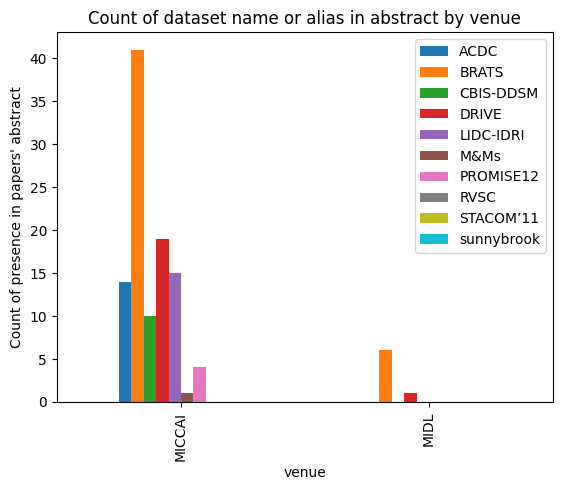

,ACDC,BRATS,CBIS-DDSM,DRIVE,LIDC-IDRI,M&Ms,PROMISE12,RVSC,STACOM’11,sunnybrook
venue,,,,,,,,,,
MICCAI,14,41,10,19,15,1,4,0,0,0
MIDL,0,6,0,1,0,0,0,0,0,0


In [22]:
datasets_columns = df_oa_abstract_allInfo.columns.difference(['doi','name','venue','year'])
df_oa_abstract_toplot = df_oa_abstract_allInfo[df_oa_abstract_allInfo.columns.difference(['doi','name','year'])]
count_per_dataset_and_venue = df_oa_abstract_toplot.groupby("venue").sum()
plt.figure()
t = count_per_dataset_and_venue.plot.bar()
plt.ylabel("Count of presence in papers' abstract")
plt.title("Count of dataset name or alias in abstract by venue")
plt.savefig('../../Results/analysis/paper_abstract_per_venue_and_dataset.png')

plt.show()
count_per_dataset_and_venue

### Number of presence in references by dataset and years

<Figure size 640x480 with 0 Axes>

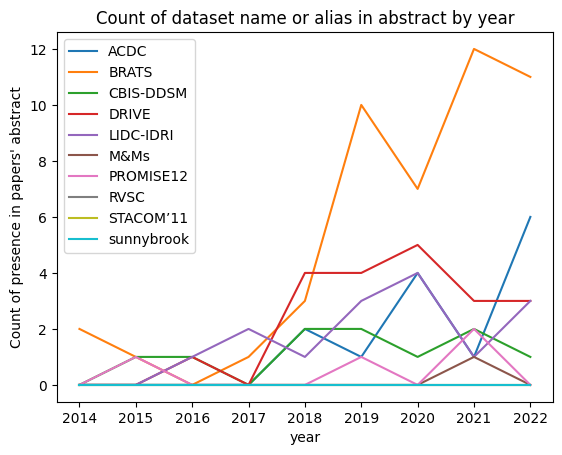

,ACDC,BRATS,CBIS-DDSM,DRIVE,LIDC-IDRI,M&Ms,PROMISE12,RVSC,STACOM’11,sunnybrook
year,,,,,,,,,,
2014.0,0,2,0,0,0,0,0,0,0,0
2015.0,0,1,1,0,0,0,1,0,0,0
2016.0,0,0,1,1,1,0,0,0,0,0
2017.0,0,1,0,0,2,0,0,0,0,0
2018.0,2,3,2,4,1,0,0,0,0,0
2019.0,1,10,2,4,3,0,1,0,0,0
2020.0,4,7,1,5,4,0,0,0,0,0
2021.0,1,12,2,3,1,1,2,0,0,0
2022.0,6,11,1,3,3,0,0,0,0,0


<Figure size 640x480 with 0 Axes>

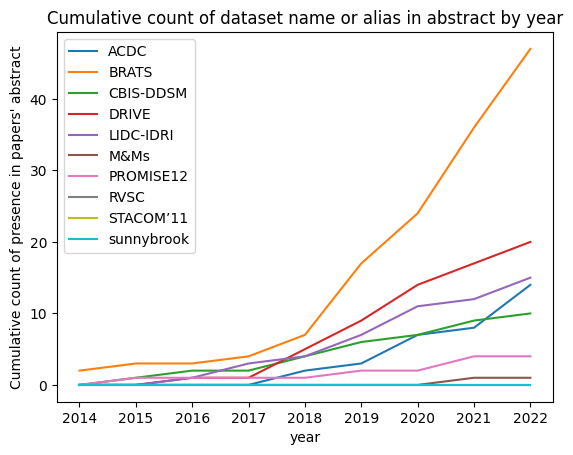

,ACDC,BRATS,CBIS-DDSM,DRIVE,LIDC-IDRI,M&Ms,PROMISE12,RVSC,STACOM’11,sunnybrook
year,,,,,,,,,,
2014.0,0,2,0,0,0,0,0,0,0,0
2015.0,0,3,1,0,0,0,1,0,0,0
2016.0,0,3,2,1,1,0,1,0,0,0
2017.0,0,4,2,1,3,0,1,0,0,0
2018.0,2,7,4,5,4,0,1,0,0,0
2019.0,3,17,6,9,7,0,2,0,0,0
2020.0,7,24,7,14,11,0,2,0,0,0
2021.0,8,36,9,17,12,1,4,0,0,0
2022.0,14,47,10,20,15,1,4,0,0,0


In [23]:
datasets_columns = df_oa_abstract_allInfo.columns.difference(['doi','name','venue','year'])
df_oa_abstract_toplot = df_oa_abstract_allInfo[df_oa_abstract_allInfo.columns.difference(['doi','name','venue'])]
count_per_dataset_and_venue = df_oa_abstract_toplot.groupby("year").sum()
plt.figure()
count_per_dataset_and_venue.plot()
plt.ylabel("Count of presence in papers' abstract")
plt.title("Count of dataset name or alias in abstract by year")
plt.savefig('../../Results/analysis/dataset_abstract_per_year.png')
plt.show()
display(count_per_dataset_and_venue)

cumulcount_per_dataset_and_venue = count_per_dataset_and_venue.cumsum()
plt.figure()
cumulcount_per_dataset_and_venue.plot()
plt.ylabel("Cumulative count of presence in papers' abstract")
plt.title("Cumulative count of dataset name or alias in abstract by year")
plt.savefig('../../Results/analysis/dataset_abstract_per_year_cumul.png')
plt.show()
display(cumulcount_per_dataset_and_venue)

### Dataviz, combination abstract and references

Text(0.5, 1.0, 'Number of time a dataset is cited both in the abstract and references')

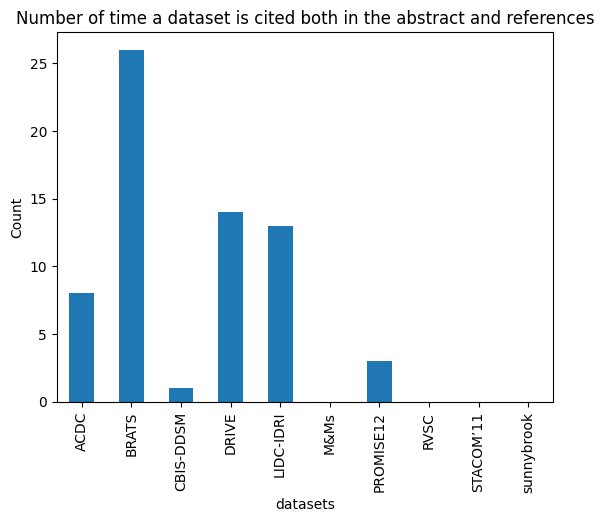

In [24]:
t1=df_oa_reference_allInfo[datasets_columns]
t2=df_oa_abstract_allInfo[datasets_columns]
plt.figure()
(t1&t2).sum().plot.bar()
plt.xlabel("datasets")
plt.ylabel("Count")
plt.title("Number of time a dataset is cited both in the abstract and references")

In [25]:
from matplotlib_venn import venn2,venn2_unweighted
number_references = sum(t1.sum())
number_abstract = sum(t2.sum())
number_of_papers = len(t1)
intersection = sum((t1&t2).sum())

3784 239 111 65


Text(0.5, 1.0, 'Venn diagram of presence in references and abstract')

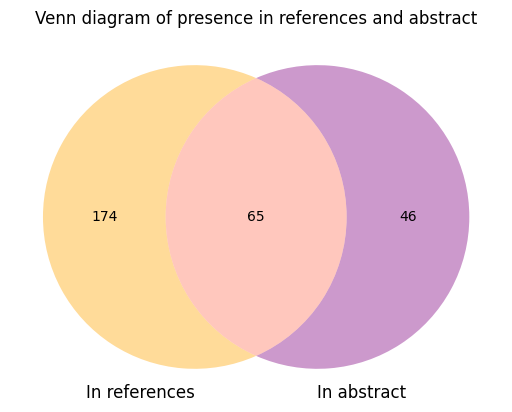

In [26]:
print(number_of_papers,number_references,number_abstract,intersection)
plt.figure()
venn2_unweighted(subsets = (number_references-intersection,number_abstract-intersection,intersection),set_labels=["In references","In abstract"],set_colors=('orange','purple'))
plt.title("Venn diagram of presence in references and abstract")

Text(0.5, 1.0, 'Venn diagram of presence in references and abstract for ACDC dataset')

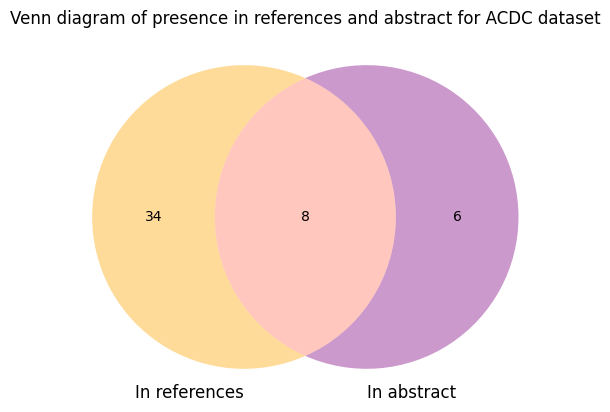

In [27]:
number_references = t1["ACDC"].sum()
number_abstract = t2["ACDC"].sum()
number_of_papers = len(t1)
intersection = (t1["ACDC"]&t2["ACDC"]).sum()

plt.figure()
venn_cicles_res = venn2_unweighted(subsets = (number_references-intersection,number_abstract-intersection,intersection),set_labels=["In references","In abstract"],set_colors=('orange','purple'))
plt.title("Venn diagram of presence in references and abstract for ACDC dataset")

## Using full text

In [28]:
# fulltext_abstract_info
# fulltext_references_info
# fulltext_method_info
# fulltext_results_info

In [29]:
one_fulltext_mention = fulltext_abstract_info[datasets_columns] | fulltext_references_info[datasets_columns] | fulltext_method_info[datasets_columns] | fulltext_results_info[datasets_columns]
one_fulltext_mention["venue"] = fulltext_abstract_info["venue"]

ACDC          41
BRATS         46
CBIS-DDSM      1
DRIVE         27
LIDC-IDRI     11
M&Ms           8
PROMISE12     11
RVSC           0
STACOM’11      0
sunnybrook     0
dtype: int64

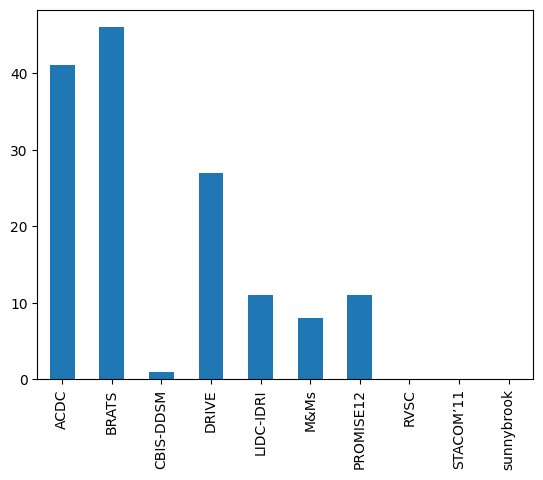

In [30]:
one_fulltext_mention[datasets_columns].sum().plot.bar()
one_fulltext_mention[datasets_columns].sum()

,ACDC,BRATS,CBIS-DDSM,DRIVE,LIDC-IDRI,M&Ms,PROMISE12,RVSC,STACOM’11,sunnybrook
venue,,,,,,,,,,
MICCAI,33,34,1,24,11,8,8,0,0,0
MIDL,8,12,0,3,0,0,3,0,0,0


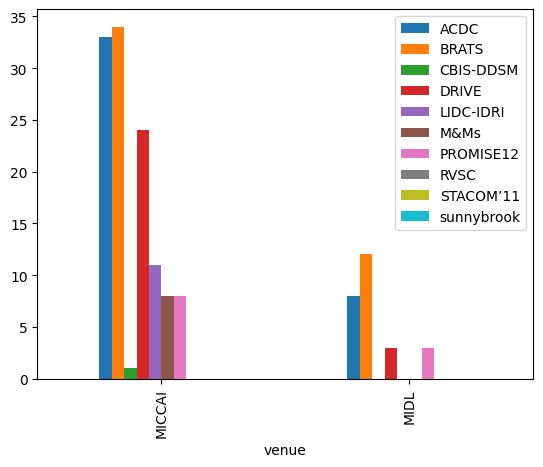

In [31]:
one_fulltext_mention.groupby("venue").sum().plot.bar()
one_fulltext_mention.groupby("venue").sum()

In [32]:
one_fulltext_mention_no_ref = fulltext_abstract_info[datasets_columns] | fulltext_method_info[datasets_columns] | fulltext_results_info[datasets_columns]
one_fulltext_mention_no_ref["venue"] = fulltext_abstract_info["venue"]

ACDC          37
BRATS         24
CBIS-DDSM      1
DRIVE         18
LIDC-IDRI     10
M&Ms           4
PROMISE12      7
RVSC           0
STACOM’11      0
sunnybrook     0
dtype: int64

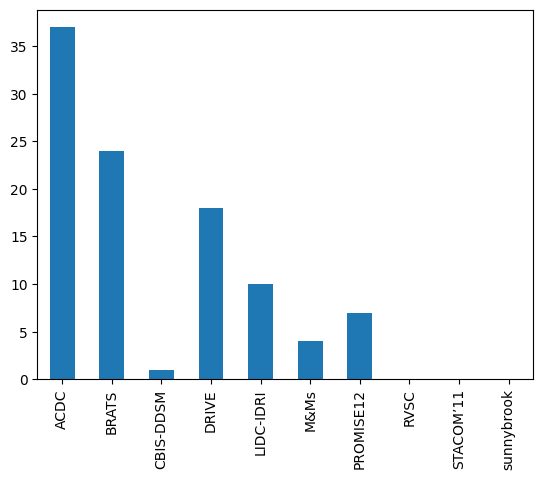

In [33]:
one_fulltext_mention_no_ref[datasets_columns].sum().plot.bar()
one_fulltext_mention_no_ref[datasets_columns].sum()

In [34]:
one_fulltext_mention_and_ref = fulltext_references_info[datasets_columns] & (fulltext_abstract_info[datasets_columns] | fulltext_method_info[datasets_columns] | fulltext_results_info[datasets_columns])
one_fulltext_mention_and_ref["venue"] = fulltext_abstract_info["venue"]

ACDC          37
BRATS         24
CBIS-DDSM      1
DRIVE         18
LIDC-IDRI     10
M&Ms           4
PROMISE12      7
RVSC           0
STACOM’11      0
sunnybrook     0
dtype: int64

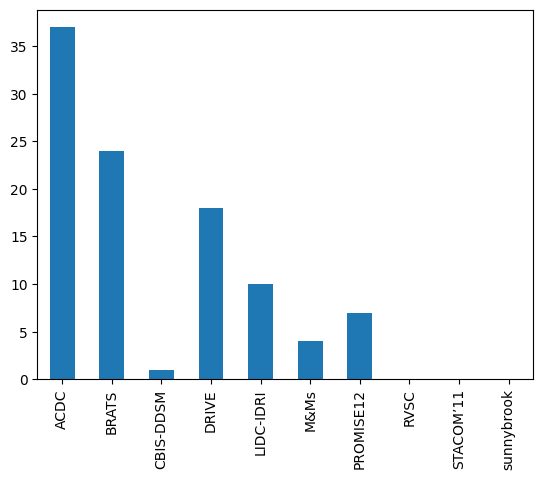

In [35]:
one_fulltext_mention_no_ref[datasets_columns].sum().plot.bar()
one_fulltext_mention_no_ref[datasets_columns].sum()

## Combine OpenAlex and Fulltext

In [36]:
from dirty_cat import fuzzy_join

common_papers = fuzzy_join(
    fulltext_abstract_info,  # our table to join
    df_oa_abstract_allInfo,  # the table to join with
    left_on="name",  # the first join key column
    right_on="name",  # the second join key column
    return_score=True,
)
#common_papers = common_papers.drop_duplicates(subset="name_y")

#Names for fulltext df
common_papers_x = common_papers["name_x"]

#Name for OA df
common_papers_y = common_papers["name_y"]

#common_papers = fulltext_abstract_info.merge(df_oa_abstract_allInfo,left_on="name",right_on="name")["name"]
df_oa_abstract_allInfo[~(df_oa_abstract_allInfo["name"].isin(common_papers_y))]

/home/theo/miniconda3/envs/PublicDataset/lib/python3.12/site-packages/dirty_cat/_fuzzy_join.py:320: UserWarning: This feature is still experimental.
  warnings.warn("This feature is still experimental.")


,doi,name,ACDC,sunnybrook,STACOM’11,RVSC,M&Ms,BRATS,PROMISE12,LIDC-IDRI,DRIVE,CBIS-DDSM,year,venue
1,10.1007/978-3-031-16431-6_41,Conditional VAEs for Confound Removal and Norm...,False,False,False,False,False,False,False,False,False,False,2022.0,MICCAI
2,10.1007/978-3-031-16434-7_36,Uncertainty Aware Sampling Framework of Weak-L...,False,False,False,False,False,False,False,False,False,False,2022.0,MICCAI
5,10.1007/978-3-031-16437-8_62,Hybrid Spatio-Temporal Transformer Network for...,False,False,False,False,False,False,False,False,False,False,2022.0,MICCAI
7,10.1007/978-3-031-16446-0_18,Unsupervised Deep Non-rigid Alignment by Low-R...,False,False,False,False,False,False,False,False,False,False,2022.0,MICCAI
8,10.1007/978-3-031-16434-7_61,DRGen: Domain Generalization in Diabetic Retin...,False,False,False,False,False,False,False,False,False,False,2022.0,MICCAI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3569,10.1007/978-3-319-10470-6_87,Pericardium Based Model Fusion of CT and Non-c...,False,False,False,False,False,False,False,False,False,False,2014.0,MICCAI
3607,NaN,TopoFit: Rapid Reconstruction of Topologically...,False,False,False,False,False,False,False,False,False,False,2022.0,MIDL
3612,NaN,Deep Learning Radiographic Assessment of Pulmo...,False,False,False,False,False,False,False,False,False,False,2022.0,MIDL
3628,NaN,Label conditioned segmentation.,False,False,False,False,False,False,False,False,False,False,2020.0,MIDL


In [37]:
sum(df_oa_abstract_allInfo[~(df_oa_abstract_allInfo["name"].isin(common_papers_y))][datasets_columns].sum())

39

In [38]:
combination = df_oa_abstract_allInfo[df_oa_abstract_allInfo["name"].isin(common_papers_y)][datasets_columns].reset_index(drop=True)|fulltext_abstract_info[fulltext_abstract_info["name"].isin(common_papers_x)][datasets_columns].reset_index(drop=True)

combination.index = common_papers["name_x"]
df_oa_abstract_allInfo_name = df_oa_abstract_allInfo.set_index(["name"])
df_oa_abstract_allInfo_name.update(combination)

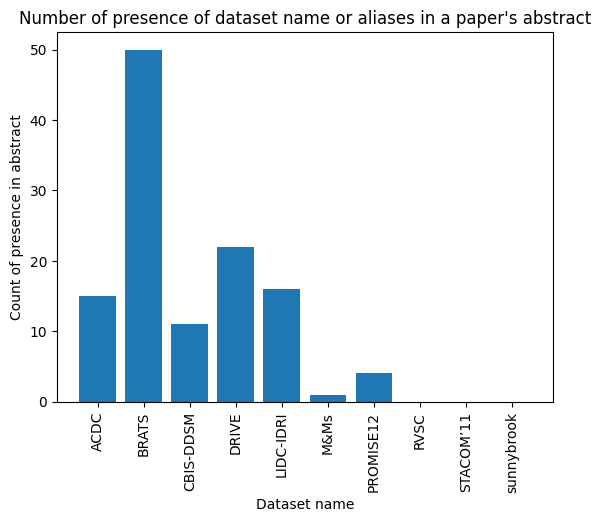

ACDC          15
BRATS         50
CBIS-DDSM     11
DRIVE         22
LIDC-IDRI     16
M&Ms           1
PROMISE12      4
RVSC           0
STACOM’11      0
sunnybrook     0
dtype: object

In [40]:
df_combine_abstract_toplot = df_oa_abstract_allInfo_name[df_oa_abstract_allInfo_name.columns.difference(['doi', 'name','venue','year'])]
plt.figure()
plt.bar(datasets_columns,df_combine_abstract_toplot.sum())
plt.xticks(datasets_columns, rotation='vertical')
plt.xlabel("Dataset name")
plt.ylabel("Count of presence in abstract")
plt.title("Number of presence of dataset name or aliases in a paper's abstract")
plt.show()
display(df_combine_abstract_toplot.sum())

## Difference comparison

In [41]:
df_oa_abstract_allInfo = pd.read_csv("../../Results/extraction/oa_papers_datasets_abstract.csv")
df_oa_abstract_allInfo["year"] = papers_info["year"]
df_oa_abstract_allInfo["venue"] = papers_info["venue"]
df_oa_abstract_allInfo = df_oa_abstract_allInfo[(df_oa_abstract_allInfo["year"]>2010) & (df_oa_abstract_allInfo["year"]<2023)]
df_oa_abstract_allInfo = df_oa_abstract_allInfo.drop_duplicates(subset=["name"])

fulltext_abstract_info = pd.read_csv("../../Results/extraction/fulltext_datasets_abstract.csv")

In [42]:
common_papers = fuzzy_join(
    fulltext_abstract_info,  # our table to join
    df_oa_abstract_allInfo,  # the table to join with
    left_on="name",  # the first join key column
    right_on="name",  # the second join key column
    return_score=True,
)
common_papers = common_papers.drop_duplicates(subset="name_y")

/home/theo/miniconda3/envs/PublicDataset/lib/python3.12/site-packages/dirty_cat/_fuzzy_join.py:320: UserWarning: This feature is still experimental.
  warnings.warn("This feature is still experimental.")


In [43]:
t1 = common_papers[[f"{ds_name}_x" for ds_name in datasets_columns]]
t2 = common_papers[[f"{ds_name}_y" for ds_name in datasets_columns]]
t1.columns = datasets_columns
t2.columns = datasets_columns

In [44]:
t1.columns = datasets_columns
t2.columns = datasets_columns
diff_t1_t2 = t1.eq(t2)
diff_df = diff_t1_t2[~((diff_t1_t2).all(axis=1))]

In [45]:
common_papers[common_papers.index.isin(diff_df.index)]

,name_x,ACDC_x,sunnybrook_x,STACOM’11_x,RVSC_x,M&Ms_x,BRATS_x,PROMISE12_x,LIDC-IDRI_x,DRIVE_x,...,RVSC_y,M&Ms_y,BRATS_y,PROMISE12_y,LIDC-IDRI_y,DRIVE_y,CBIS-DDSM_y,year,venue,matching_score
194,mmFormer: Multimodal Medical Transformer for I...,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,2022.0,MICCAI,0.950271
226,Adversarial Pseudo Healthy Synthesis Needs Pat...,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,2019.0,MIDL,1.000000
255,HAD-Net: A Hierarchical Adversarial Knowledge ...,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,2021.0,MIDL,1.000000
296,ACN: Adversarial Co-training Network for Brain...,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,2021.0,MICCAI,0.912913
302,A Robust Volumetric Transformer for Accurate 3...,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,2022.0,MICCAI,0.927629
364,TransBTS: Multimodal Brain Tumor Segmentation ...,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,2021.0,MICCAI,0.866221
385,Is it Possible to Predict MGMT Promoter Methyl...,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,2022.0,MIDL,0.865285
421,Transfer Learning by Adaptive Merging of Multi...,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,2019.0,MIDL,1.000000
533,Knowledge Distillation from Multi-modal to Mon...,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,2020.0,MICCAI,0.912798
542,Multi-task Neural Networks with Spatial Activa...,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,2019.0,MICCAI,0.807886


In [46]:
common_papers[common_papers.index.isin(diff_df.index)].to_csv("./diff.csv")

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
papers_info = pd.read_csv("../../Results/extraction/papers_infos_openalex.csv")
df_oa_reference_allInfo = pd.read_csv("../../Results/extraction/oa_papers_datasets_reference.csv")
df_oa_reference_allInfo["year"] = papers_info["year"]
df_oa_reference_allInfo["venue"] = papers_info["venue"]
df_oa_reference_allInfo = df_oa_reference_allInfo[(df_oa_reference_allInfo["year"]>2010) & (df_oa_reference_allInfo["year"]<2023)]

df_oa_abstract_allInfo = pd.read_csv("../../Results/extraction/oa_papers_datasets_abstract.csv")
df_oa_abstract_allInfo["year"] = papers_info["year"]
df_oa_abstract_allInfo["venue"] = papers_info["venue"]
df_oa_abstract_allInfo = df_oa_abstract_allInfo[(df_oa_abstract_allInfo["year"]>2010) & (df_oa_abstract_allInfo["year"]<2023)]

fulltext_abstract_info = pd.read_csv("../../Results/extraction/fulltext_datasets_abstract.csv")


datasets_columns = df_oa_reference_allInfo.columns.difference(['doi','name','venue','year'])

## Co-occurence matrix

In [48]:
import seaborn as sns
import numpy as np
co_occ = df_oa_reference_allInfo[datasets_columns].astype(int)
co_occ = co_occ.T.dot(co_occ)
co_occ

,ACDC,BRATS,CBIS-DDSM,DRIVE,LIDC-IDRI,M&Ms,PROMISE12,RVSC,STACOM’11,sunnybrook
ACDC,42,3,0,0,0,2,3,0,0,2
BRATS,3,79,0,0,2,0,1,0,0,0
CBIS-DDSM,0,0,4,0,0,0,0,0,0,0
DRIVE,0,0,0,42,1,0,0,0,0,0
LIDC-IDRI,0,2,0,1,39,0,0,0,0,0
M&Ms,2,0,0,0,0,8,0,0,0,0
PROMISE12,3,1,0,0,0,0,19,0,0,0
RVSC,0,0,0,0,0,0,0,1,0,0
STACOM’11,0,0,0,0,0,0,0,0,0,0
sunnybrook,2,0,0,0,0,0,0,0,0,5


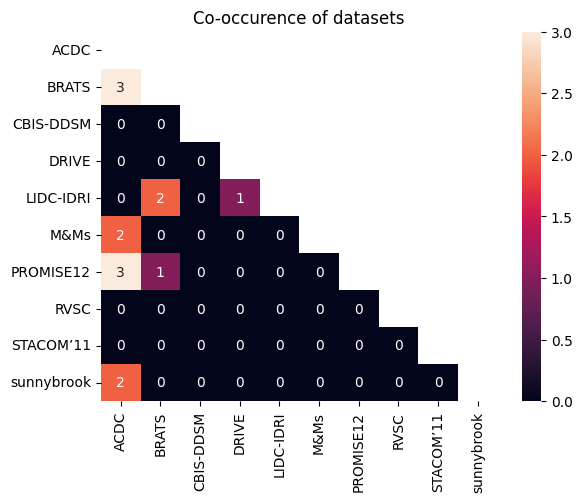

In [49]:
plt.figure()
plt.title("Co-occurence of datasets")
sns.heatmap(co_occ,annot=True,mask=np.triu(np.ones_like(co_occ)))
plt.savefig('../../Results/analysis/Co_occurence_datasets.png',bbox_inches='tight')
plt.show()

## Stack bar per dataset

In [235]:
# Merge OpenAlex with Fulltext extraction for references and abstract

#For abstract
combination = df_oa_abstract_allInfo[df_oa_abstract_allInfo["name"].isin(common_papers_y)][datasets_columns].reset_index(drop=True)|fulltext_abstract_info[fulltext_abstract_info["name"].isin(common_papers_x)][datasets_columns].reset_index(drop=True)
combination.index = common_papers["name_x"]
df_merge_abstract = df_oa_abstract_allInfo.set_index(["name"])
df_merge_abstract.update(combination)

In [236]:
#For references
#fulltext_references_info["name"] = fulltext_references_info["name"].apply(lambda x:x.removesuffix("pdf"))
combination = df_oa_reference_allInfo[df_oa_reference_allInfo["name"].isin(common_papers_y)][datasets_columns].reset_index(drop=True)|fulltext_references_info[fulltext_references_info["name"].isin(common_papers_x)][datasets_columns].reset_index(drop=True)
combination.index = common_papers["name_x"]
df_merge_ref = df_oa_reference_allInfo.set_index(["name"])
df_merge_ref.update(combination)

In [237]:
df_abstract_and_ref = df_merge_ref[datasets_columns] & df_merge_abstract[datasets_columns]
df_abstract_and_ref.index = df_merge_ref.index

df_only_abstract = df_merge_abstract[datasets_columns] & (~df_abstract_and_ref[datasets_columns])
df_only_ref = df_merge_ref[datasets_columns] & (~df_abstract_and_ref[datasets_columns])

total_papers_per_dataset = df_only_ref.sum() + df_only_abstract.sum() + df_abstract_and_ref.sum()

In [258]:
total_papers_per_dataset

ACDC           53
BRATS         107
CBIS-DDSM      14
DRIVE          50
LIDC-IDRI      43
M&Ms           10
PROMISE12      23
RVSC            1
STACOM’11       0
sunnybrook      6
dtype: int64

In [238]:
perc_dataset_ref = ((df_only_ref.sum() / total_papers_per_dataset) * 100).fillna(0)
perc_dataset_all = ((df_abstract_and_ref.sum() / total_papers_per_dataset) * 100).fillna(0)
perc_dataset_abstract = ((df_only_abstract.sum() / total_papers_per_dataset) * 100).fillna(0)

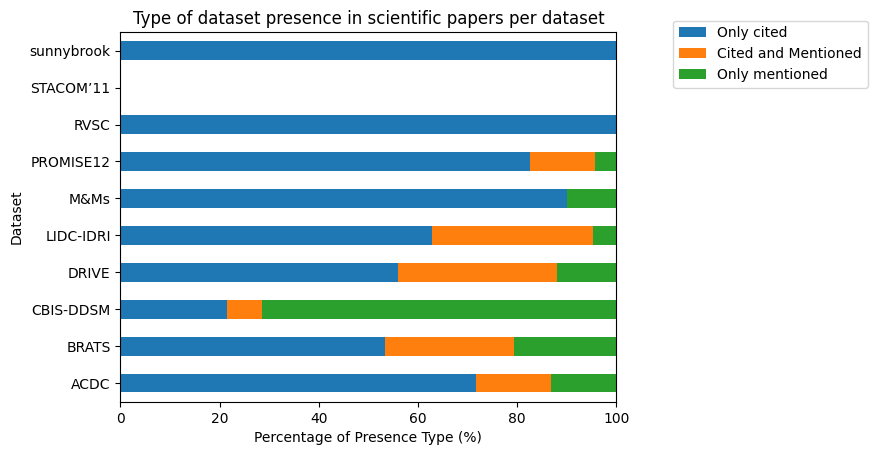

,ACDC,BRATS,CBIS-DDSM,DRIVE,LIDC-IDRI,M&Ms,PROMISE12,RVSC,STACOM’11,sunnybrook
Only cited,71.698113,53.271028,21.428571,56.0,62.790698,90.0,82.608696,100.0,0.0,100.0
Cited and Mentioned,15.094340,26.168224,7.142857,32.0,32.558140,0.0,13.043478,0.0,0.0,0.0
Only mentioned,13.207547,20.560748,71.428571,12.0,4.651163,10.0,4.347826,0.0,0.0,0.0


In [239]:
df_stackbar = pd.DataFrame(data=[perc_dataset_ref,perc_dataset_all,perc_dataset_abstract])
df_stackbar.index = ["Only cited","Cited and Mentioned", "Only mentioned"]
ax = df_stackbar.T.plot.barh(stacked=True)

# Place the legend
ax.legend(bbox_to_anchor=(1.1, 1.05))
plt.xlim(0, 100)
plt.title("Type of dataset presence in scientific papers per dataset")
plt.xlabel('Percentage of Presence Type (%)')
plt.ylabel('Dataset')
plt.show()
df_stackbar

## Stack bar per dataset and venue

In [240]:
df_abstract_and_ref["venue"] = df_merge_ref["venue"]
df_only_abstract["venue"] = df_merge_ref["venue"]
df_only_ref["venue"] = df_merge_ref["venue"]

df_only_ref_venue = df_only_ref.groupby("venue").sum().T
df_only_abstract_venue = df_only_abstract.groupby("venue").sum().T
df_abstract_and_ref_venue = df_abstract_and_ref.groupby("venue").sum().T
total_papers_per_dataset_and_venue = df_only_ref_venue + df_only_abstract_venue + df_abstract_and_ref_venue

In [241]:
perc_ref_venue = ((df_only_ref_venue / total_papers_per_dataset_and_venue) * 100).fillna(0).T
perc_abstract_venue = ((df_only_abstract_venue / total_papers_per_dataset_and_venue) * 100).fillna(0).T
perc_both_venue = ((df_abstract_and_ref_venue / total_papers_per_dataset_and_venue) * 100).fillna(0).T

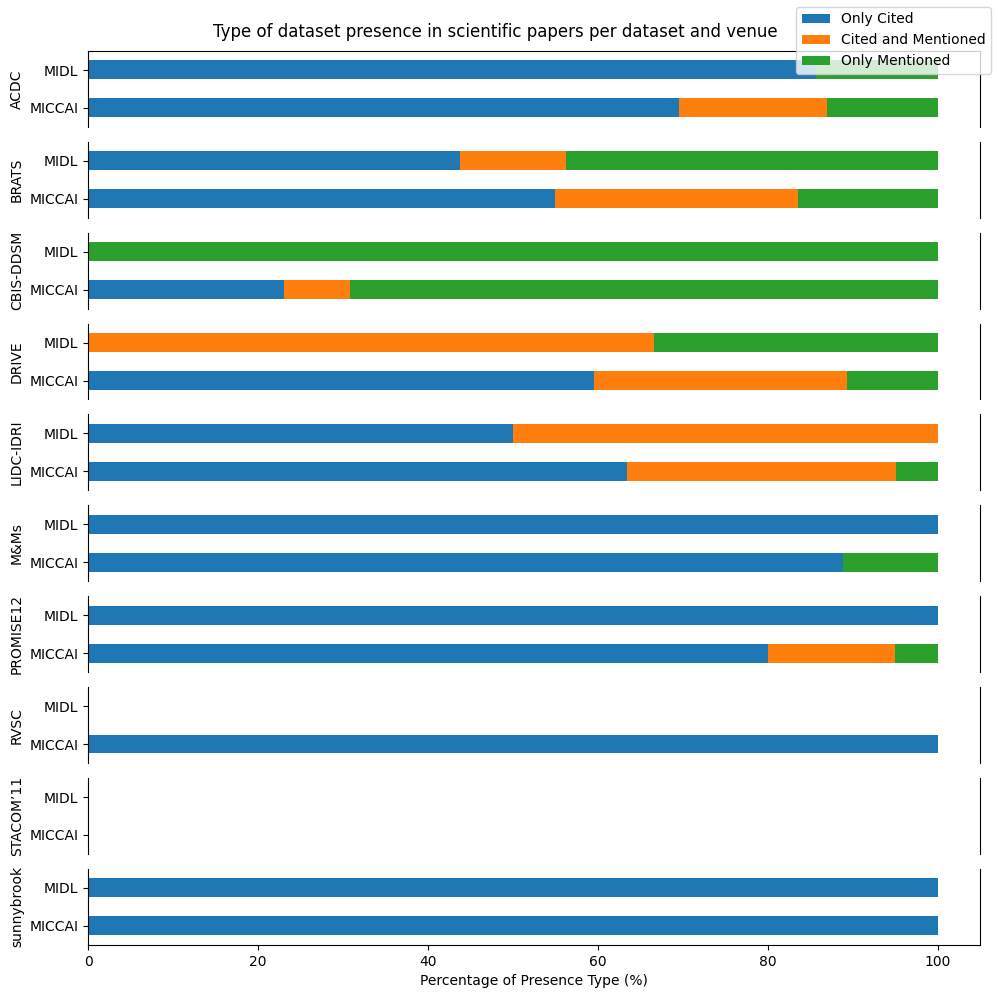

In [242]:
f,axes = plt.subplots(len(perc_ref_venue.columns),1,figsize=(10,10))
for i,dataset in enumerate(perc_ref_venue.columns):
    ax = axes[i]
    abstract_per = perc_abstract_venue[dataset]
    ref_per = perc_ref_venue[dataset]
    both_per = perc_both_venue[dataset]
    df = pd.DataFrame(data=[ref_per,both_per,abstract_per])
    df.index = ["Only Cited","Cited and Mentioned", "Only Mentioned"]
    ax = df.T.plot.barh(stacked=True,ax=ax)
    ax.get_legend().remove()
    ax.set_ylabel(dataset)
    ax.get_xaxis().set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_visible(False)

axes[0].spines["top"].set_visible(True)
ax.spines["bottom"].set_visible(True)
ax.get_xaxis().set_visible(True)
ax.set_xlabel("Percentage of Presence Type (%)")
handles, labels = ax.get_legend_handles_labels()
f.legend(handles, labels)
plt.suptitle("Type of dataset presence in scientific papers per dataset and venue")
f.tight_layout()


## Evolution of presence type over years

In [461]:
df_only_ref["year"] = df_merge_ref["year"]
df_only_abstract["year"] = df_merge_ref["year"]
df_abstract_and_ref["year"] = df_merge_ref["year"]

ref_citing_per_year = df_only_ref.groupby(["year","venue"]).sum().sum(axis=1).unstack(fill_value=0)
abstract_mention_per_year = df_only_abstract.groupby(["year","venue"]).sum().sum(axis=1).unstack(fill_value=0)
both_per_year = df_abstract_and_ref.groupby(["year","venue"]).sum().sum(axis=1).unstack(fill_value=0)
total_number_of_citations_per_year = ref_citing_per_year + abstract_mention_per_year + both_per_year

<Figure size 640x480 with 0 Axes>

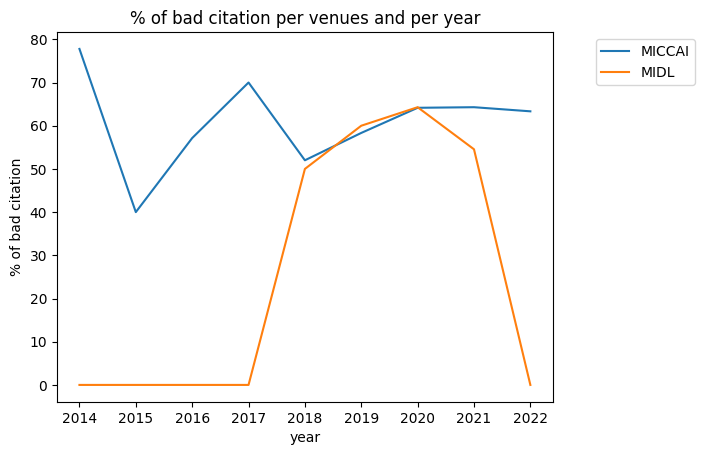

In [467]:
df_evol_perc = ((ref_citing_per_year / total_number_of_citations_per_year) * 100).fillna(0)
plt.figure()
df_evol_perc.plot()
plt.ylabel("% of bad citation")
plt.legend(bbox_to_anchor=(1.3, 1))
plt.title("% of bad citation per venues and per year")
plt.show()